In [1]:
###Importamos las bibliotecas necesarias:
##Importamos Pandas para trabajar con DataFrames
import pandas as pd

##Importamos Numpy para incluir más funciones matematicas
import numpy as np

##Importamos MatPlotLib para realizar representaciones
import matplotlib.pyplot as plt

##Importamos la función display de la biblioteca IPython.display, que permite mostrar contenido de manera mas enriquecida
from IPython.display import display

##Immportamos el generador de números aleatorios
import random

In [9]:
#Definimos una funcion para representar de manera cómoda dos señales diferentes aleatorias en un mismo grafico, que provengan del mismo conjunto de datos
def plot_pulsos(data, n_random = None, m_random = None):
    if n_random == None and m_random == None:
        #Generar dos números enteros aleatorios entre 1 y el número total de señales
        n_random = random.randint(1, data.shape[0])
        m_random = random.randint(1, data.shape[0])
    elif n_random is not None and m_random is not None:
        n_random = n_random
        m_random = m_random
        
    #Representacion de las señales en un plot
    plt.figure(figsize = (10, 5))
    plt.plot(data.iloc[n_random], label = "Señal 1", color = "blue")
    plt.plot(data.iloc[m_random], label = "Señal 2", color = "red")
    plt.xticks([])
    plt.title('Señal de core')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()

    return (n_random, m_random)

In [3]:
#Función para normalizar las señales. Proporciona dos opciones: 1 para normalizar a [0,1] y 2 para normalizar respecto al valor máximo
#Por defecto normaliza a escala [0,1]
def normalizacion(df, tipo = 1):
    #Normalización [0,1]
    if tipo == 1:
        maximos_fila = df.max(axis = 1).to_numpy() #Extraemos el valor máximo de las filas
        minimos_fila = df.min(axis = 1).to_numpy() #Extraemos el valor mínimo de las filas
        df = (df - minimos_fila[:, None])/(maximos_fila[:, None] - minimos_fila[:, None]) #Normalizamos los valores del Dataframe
        return df
    
    #Normalización respecto al máximo
    if tipo == 2:
        maximos_fila = df.max(axis = 1).to_numpy() #Extraemos el valor máximos de las filas
        df = df/maximos_fila[:, None] #Dividimos cada fila por su máximo
        return df

In [4]:
##Defino una función que tome un dataframe de AGATA como argumento y devuelve un dataframe con índices múltiples en las columnas que permite acceder al tiempo, la energía y los pulsos de cada segmento
def set_multindex(df):
    #Generamos una copia del dataframe para no modificar el original
    df_copy = df.copy()

    #Separamos el tiempo del dataframe
    tiempo = df_copy.pop("Tiempo")
    serie_df = pd.DataFrame({'Tiempo': tiempo})
    #Guardamos los valores de la energía en una variable distinta y guardamos tambien los valores del pulso
    energy = df_copy.iloc[:,0:37]
    pulso = df_copy.iloc[:, 37 : 3738]

    #Generamos el índice múltiple para la etiqueta del tiempo
    iterables = [["Tiempo"], ["time"]]
    multindex = pd.MultiIndex.from_product(iterables)
    serie_df.columns = multindex

    #Generamos el multindex para la energía de cada segmento y lo asignamos a las columnas del datafrmae correspondiente
    iterables = [["Energy"], list(range(0,37))]
    multindex = pd.MultiIndex.from_product(iterables)
    energy.columns = multindex

    #Generamos el multindex para el pulso en cada uno de los 36 segmentos y el core, y lo asignamos al dataframe correspondiente
    iterables = [list(range(0,37)), list(range(1,101))]
    multindex = pd.MultiIndex.from_product(iterables)
    pulso.columns = multindex

    df_copy = pd.concat([serie_df, energy, pulso], axis = 1)
    return df_copy

In [5]:
##Definimos la función para leer el archivo completo
def read_AGATA_data_full(path):
    ##Cargamos los datos en un data frame
    inputfile = pd.read_csv(path, sep = "\t", header = None, dtype = np.float64, chunksize = None) #Tabulaciones como separador, sin encabezado y sin realizar división del dataframe
    df = inputfile.drop([3738], axis = 1, errors = 'ignore') #Elimino la última colummna que solo tiene valores Nan

    #Generamos las nuevas etiquetas para el tiempo y el pulso en todos los segmentos: la primera columna corresponde al tiempo, los 37 siguientes valores corresponden a la energia de los segmentos y el core, y los demas valores son el pulso en los distintos segmentos
    etiquetas = ["Tiempo"] + list(range(1,38)) + list(range(1,3701))
    df.columns = etiquetas

    return df #Devuelve un data frame

In [6]:
##En primer lugar leemos el archivo de datos, quedandonos con las columnas de los pulsos y realizando una serie de cambios en el dataframe para que sea más accesible
path = "./Data/Digiopt_Segm+Core_511.dat"
#Leemos el archivo de datos mediante la función correspondiente
df = read_AGATA_data_full(path)
#Modificamos los indices del DataFrame para acceder de manera comoda a la señal del core
df_multindex = set_multindex(df)

#Guardamos de manera separada la señal del core
core_signals = df_multindex[36]
core_signals.to_csv("./Data/Core_signal.dat", index = False, sep = "\t")

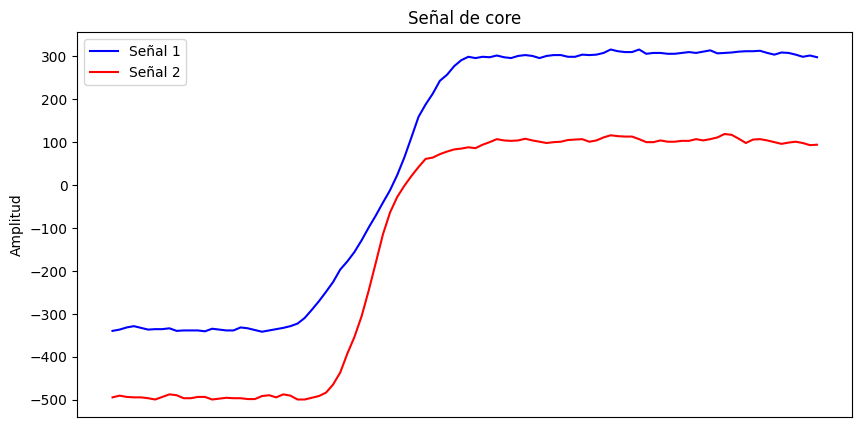

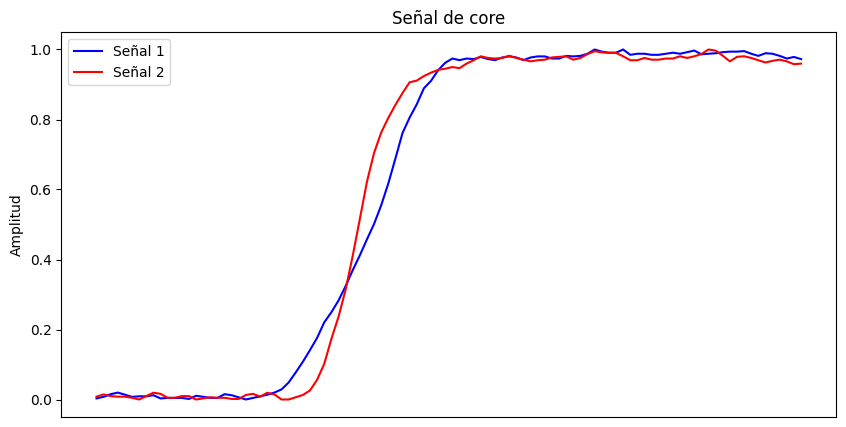

(1053, 11447)

In [34]:
##Representamos dos señales aleatorias del core, mediante la fucnión ya definida, para inspeccionar la forma que tienen.
core = df_multindex[36]
core_norm = normalizacion(core)
n, m = plot_pulsos(core)
plot_pulsos(core_norm, n_random = n, m_random = m)